# Регуляризация линейной регрессии. Практическая работа

## Цель практической работы

Научиться строить модель линейной регрессии с регуляризацией на реальных данных.

## Что входит в практическую работу

1. Загрузить данные и ознакомиться с ними.
2. Изучить данные и провести анализ, сконструировать новые признаки.
3. Разделить данные на обучающую и тестовую выборки.
4. Реализовать построение модели с помощью библиотеки Scikit-learn.
5. Подобрать коэффициенты регуляризации.
6. Получить качество модели с помощью MSE, MAE, $R^2$.
7. Ответить на вопросы в конце блокнота.

## Что оценивается 

- Выполнены все этапы работы.
- Подобраны коэффициенты регуляризации.
- Сделан вывод по результатам.
- Модель не переобучена.
- Получена модель хорошего качества.
- Сделаны выводы в конце блокнота.

## Как отправить работу на проверку

Скачайте файл с заданиями в материалах, откройте его через Jupyter Notebook и выполните задания.

## Задача

С набором данных вы уже знакомы из прошлого модуля — это данные по продажам домов. В этот раз признаков будет чуть больше, чтобы вам было интереснее. Краткое описание признаков:

* **LotArea** — размер участка в квадратных футах.
* **LotArea_M** — размер участка в квадратных метрах.
* **Street** — тип доступа к дороге.
* **BldgType** — тип жилья.
* **OverallQual** — общее качество материала и отделки.
* **OverallCond** — общая оценка состояния.
* **YearBuilt** — первоначальная дата постройки.
* **YearRemodAdd** — дата реконструкции.
* **RoofStyle** — тип крыши.
* **ExterQual** — качество материалов снаружи.
* **ExterCond** — текущее состояние материалов снаружи.
* **Foundation** — тип фундамента.
* **TotalBsmtSF** — общая площадь подвала в квадратных футах.
* **TotalBsmtSF_M** — общая площадь подвала в квадратных метрах.
* **Heating** — тип отопления.
* **HeatingQC** — качество и состояние отопления.
* **CentralAir** — кондиционирование.
* **GrLivArea** — жилая площадь в квадратных футах.
* **GrLivArea_M** — жилая площадь в квадратных метрах.
* **Bath** — количество ванных комнат.
* **KitchenQual** — качество кухни.
* **GarageArea** — площадь гаража в квадратных футах.
* **GarageArea_M** — площадь гаража в квадратных метрах.
* **DateSold** — месяц и год продажи.
* **SaleCondition** — условия сделки.
* **SalePrice** — стоимость продажи в долларах. Это целевая переменная, которую нам нужно предсказать.

Постройте модель линейной регрессии на этих данных. Проверьте качество модели на обучающей и тестовой выборках с помощью MAE, MSE, $R^2$. Определите, что модель не переобучилась.

## Задание 1 

Подключите необходимые библиотеки.

In [246]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score, mean_squared_error, root_mean_squared_error, confusion_matrix

## Задание 2

Считайте данные и посмотрите на несколько строк.

In [94]:
df = pd.read_csv("data_5JBG62b.csv")

In [96]:
df

,LotArea,LotArea_M,Street,BldgType,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,ExterQual,...,CentralAir,GrLivArea,GrLivArea_M,Bath,KitchenQual,GarageArea,GarageArea_M,DateSold,SaleCondition,SalePrice
0,8450,785.030350,Pave,1Fam,7,5,2003,2003,Gable,Gd,...,Y,1710,158.864130,3,Gd,548,50.910844,2/2008,Normal,208500
1,9600,891.868800,Pave,1Fam,6,8,1976,1976,Gable,TA,...,Y,1262,117.243586,2,TA,460,42.735380,5/2007,Normal,181500
2,11250,1045.158750,Pave,1Fam,7,5,2001,2002,Gable,Gd,...,Y,1786,165.924758,3,Gd,608,56.485024,9/2008,Normal,223500
3,9550,887.223650,Pave,1Fam,7,5,1915,1970,Gable,TA,...,Y,1717,159.514451,1,Gd,642,59.643726,2/2006,Abnorml,140000
4,14260,1324.796780,Pave,1Fam,8,5,2000,2000,Gable,Gd,...,Y,2198,204.200794,3,Gd,836,77.666908,12/2008,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,735.513051,Pave,1Fam,6,5,1999,2000,Gable,TA,...,Y,1647,153.011241,3,TA,460,42.735380,8/2007,Normal,175000
1456,13175,1223.997025,Pave,1Fam,6,6,1978,1988,Gable,TA,...,Y,2073,192.587919,2,TA,500,46.451500,2/2010,Normal,210000
1457,9042,840.028926,Pave,1Fam,7,9,1941,2006,Gable,Ex,...,Y,2340,217.393020,2,Gd,252,23.411556,5/2010,Normal,266500
1458,9717,902.738451,Pave,1Fam,5,6,1950,1996,Hip,TA,...,Y,1078,100.149434,1,Gd,240,22.296720,4/2010,Normal,142125


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotArea        1460 non-null   int64  
 1   LotArea_M      1460 non-null   float64
 2   Street         1460 non-null   object 
 3   BldgType       1460 non-null   object 
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   RoofStyle      1460 non-null   object 
 9   ExterQual      1460 non-null   object 
 10  ExterCond      1460 non-null   object 
 11  Foundation     1460 non-null   object 
 12  TotalBsmtSF    1460 non-null   int64  
 13  TotalBsmtSF_M  1460 non-null   float64
 14  Heating        1460 non-null   object 
 15  HeatingQC      1460 non-null   object 
 16  CentralAir     1460 non-null   object 
 17  GrLivArea      1460 non-null   int64  
 18  GrLivAre

In [100]:
df.describe()

,LotArea,LotArea_M,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,TotalBsmtSF_M,GrLivArea,GrLivArea_M,Bath,GarageArea,GarageArea_M,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,977.044879,6.099315,5.575342,1971.267808,1984.865753,1057.429452,98.238368,1515.463699,140.791124,1.947945,472.980137,43.941274,180921.195890
std,9981.264932,927.289456,1.382997,1.112799,30.202904,20.645407,438.705324,40.757041,525.480383,48.818704,0.794965,213.804841,19.863111,79442.502883
min,1300.000000,120.773900,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,334.000000,31.029602,0.000000,0.000000,0.000000,34900.000000
25%,7553.500000,701.742811,5.000000,5.000000,1954.000000,1967.000000,795.750000,73.927562,1129.500000,104.933938,1.000000,334.500000,31.076054,129975.000000
50%,9478.500000,880.581085,6.000000,5.000000,1973.000000,1994.000000,991.500000,92.113325,1464.000000,136.009992,2.000000,480.000000,44.593440,163000.000000
75%,11601.500000,1077.814155,7.000000,6.000000,2000.000000,2004.000000,1298.250000,120.611320,1776.750000,165.065405,3.000000,576.000000,53.512128,214000.000000
max,215245.000000,19996.906235,10.000000,9.000000,2010.000000,2010.000000,6110.000000,567.637330,5642.000000,524.158726,4.000000,1418.000000,131.736454,755000.000000


## Задание 3 

Проведите разведочный анализ:

1. Выведите описательные статистики для числовых признаков.

In [103]:
df.describe(include=["int", "float"])

,LotArea,LotArea_M,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,TotalBsmtSF_M,GrLivArea,GrLivArea_M,Bath,GarageArea,GarageArea_M,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,977.044879,6.099315,5.575342,1971.267808,1984.865753,1057.429452,98.238368,1515.463699,140.791124,1.947945,472.980137,43.941274,180921.195890
std,9981.264932,927.289456,1.382997,1.112799,30.202904,20.645407,438.705324,40.757041,525.480383,48.818704,0.794965,213.804841,19.863111,79442.502883
min,1300.000000,120.773900,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,334.000000,31.029602,0.000000,0.000000,0.000000,34900.000000
25%,7553.500000,701.742811,5.000000,5.000000,1954.000000,1967.000000,795.750000,73.927562,1129.500000,104.933938,1.000000,334.500000,31.076054,129975.000000
50%,9478.500000,880.581085,6.000000,5.000000,1973.000000,1994.000000,991.500000,92.113325,1464.000000,136.009992,2.000000,480.000000,44.593440,163000.000000
75%,11601.500000,1077.814155,7.000000,6.000000,2000.000000,2004.000000,1298.250000,120.611320,1776.750000,165.065405,3.000000,576.000000,53.512128,214000.000000
max,215245.000000,19996.906235,10.000000,9.000000,2010.000000,2010.000000,6110.000000,567.637330,5642.000000,524.158726,4.000000,1418.000000,131.736454,755000.000000


2. Постройте матрицу корреляций числовых признаков. Удалите линейно-зависимые признаки из данных.

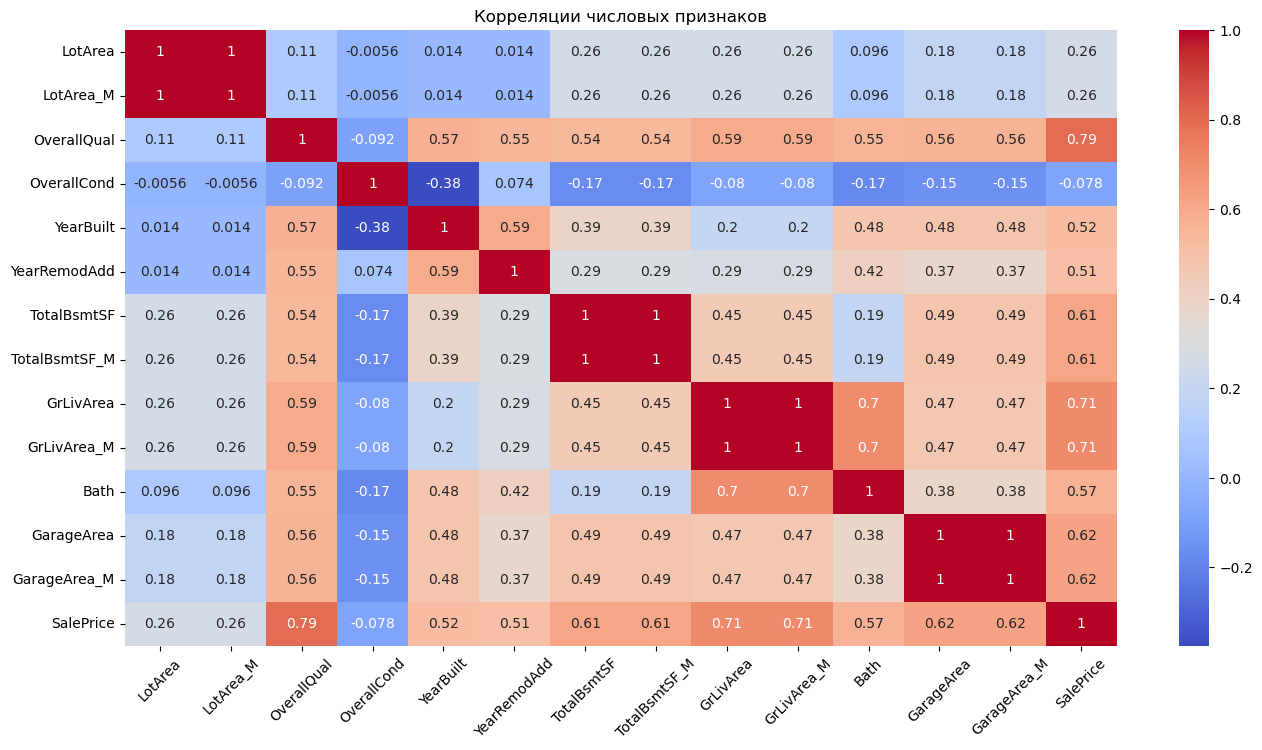

In [106]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Корреляции числовых признаков")
plt.xticks(rotation=45)
plt.show()

### По матрице корреляции можем заметить, что LotArea_M, TotalBsmtSF, GrLivArea, GarageArea линейно зависимые признаки.

In [108]:
df = df.drop(["LotArea_M", "TotalBsmtSF_M", "GrLivArea_M", "GarageArea_M"], axis=1)

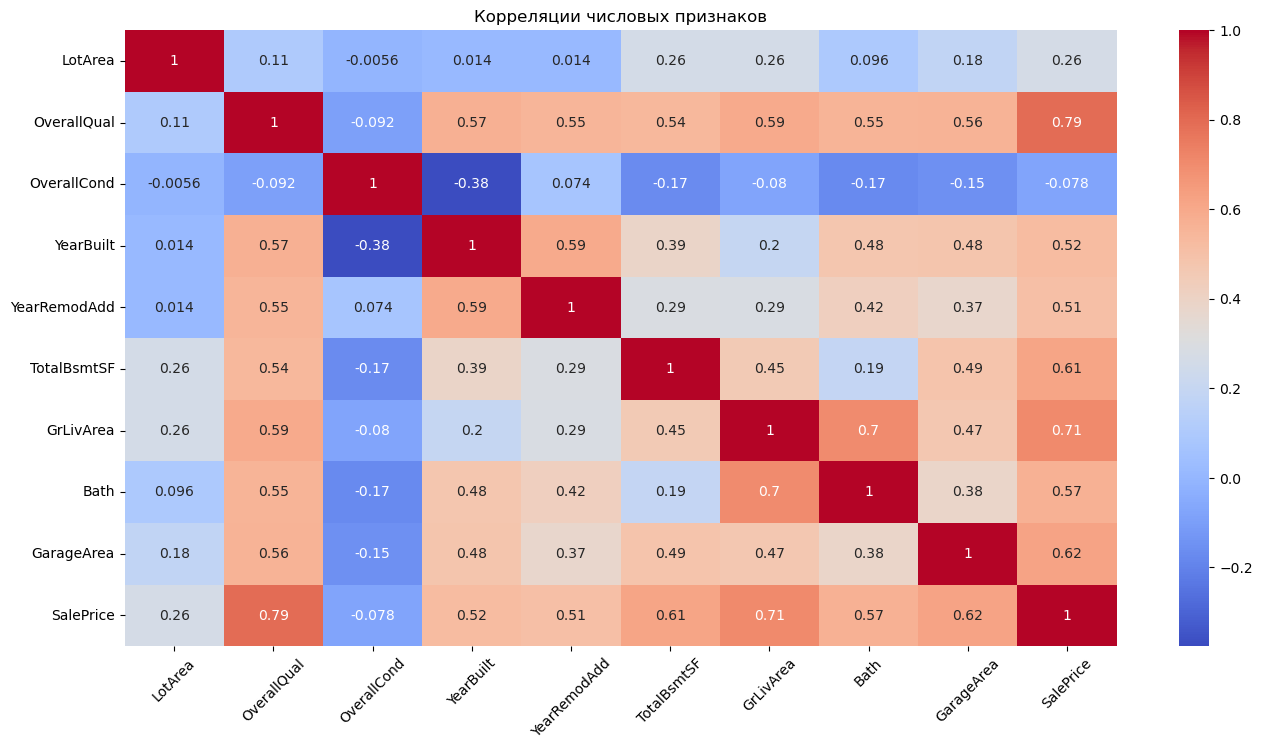

In [110]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Корреляции числовых признаков")
plt.xticks(rotation=45)
plt.show()

3. Посмотрите на индивидуальные графики зависимости целевой функции и отдельной переменной.

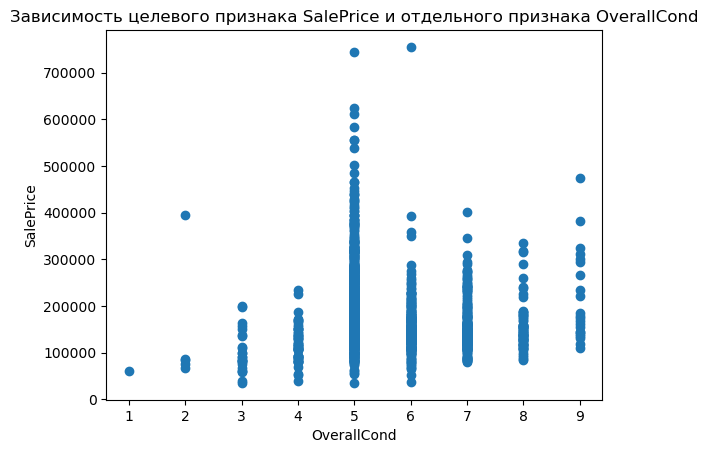

In [54]:
plt.scatter(df['OverallCond'], df['SalePrice'])
plt.xlabel('OverallCond')
plt.ylabel('SalePrice')
plt.title('Зависимость целевого признака SalePrice и отдельного признака OverallCond')
plt.show()

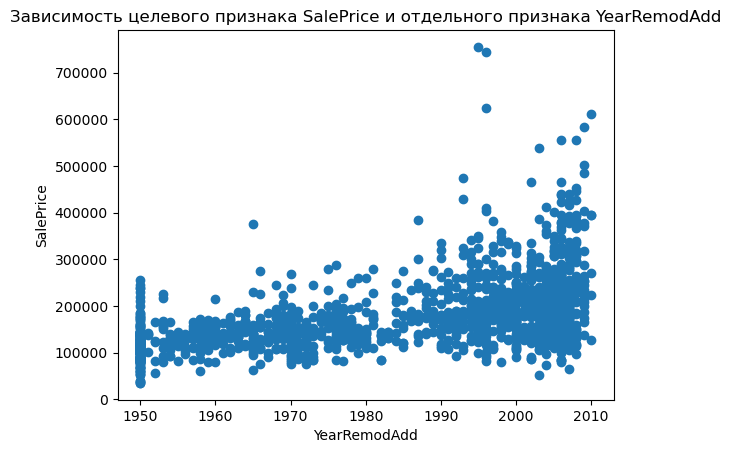

In [56]:
plt.scatter(df['YearRemodAdd'], df['SalePrice'])
plt.xlabel('YearRemodAdd')
plt.ylabel('SalePrice')
plt.title('Зависимость целевого признака SalePrice и отдельного признака YearRemodAdd')
plt.show()

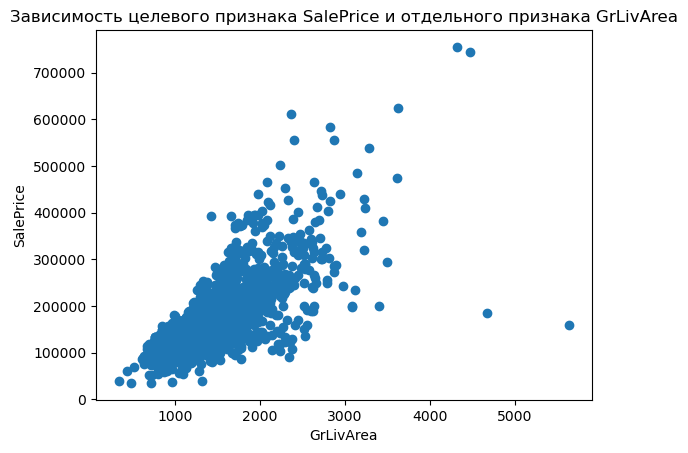

In [112]:
plt.scatter(df['GrLivArea'], df['SalePrice'])
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.title('Зависимость целевого признака SalePrice и отдельного признака GrLivArea')
plt.show()

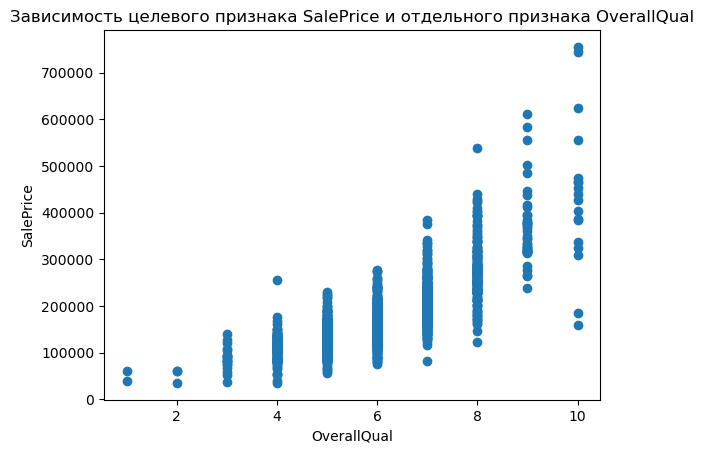

In [60]:
plt.scatter(df['OverallQual'], df['SalePrice'])
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.title('Зависимость целевого признака SalePrice и отдельного признака OverallQual')
plt.show()

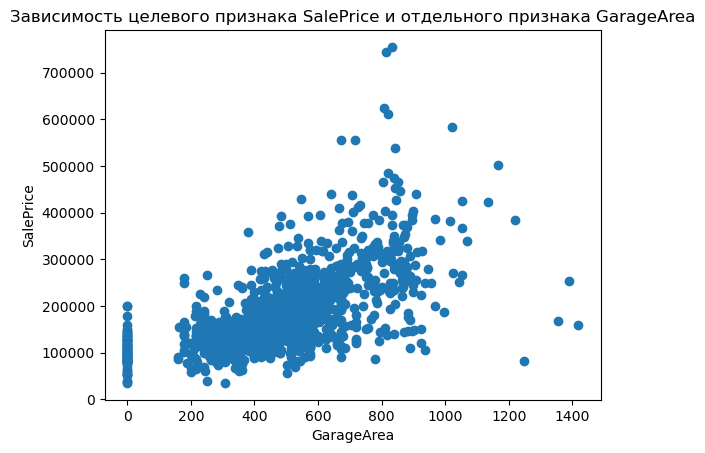

In [114]:
plt.scatter(df['GarageArea'], df['SalePrice'])
plt.xlabel('GarageArea')
plt.ylabel('SalePrice')
plt.title('Зависимость целевого признака SalePrice и отдельного признака GarageArea')
plt.show()

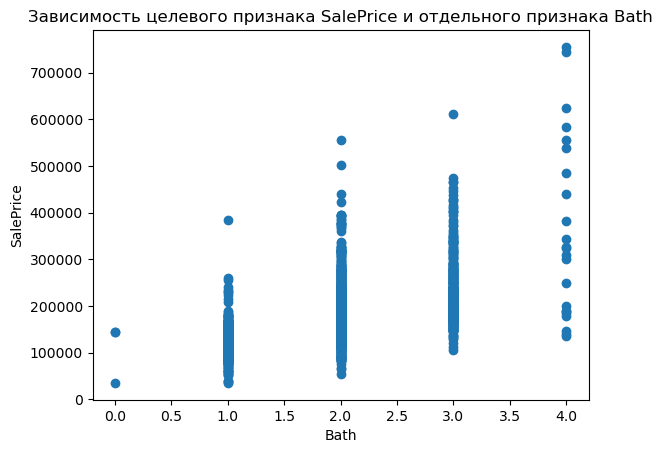

In [64]:
plt.scatter(df['Bath'], df['SalePrice'])
plt.xlabel('Bath')
plt.ylabel('SalePrice')
plt.title('Зависимость целевого признака SalePrice и отдельного признака Bath')
plt.show()

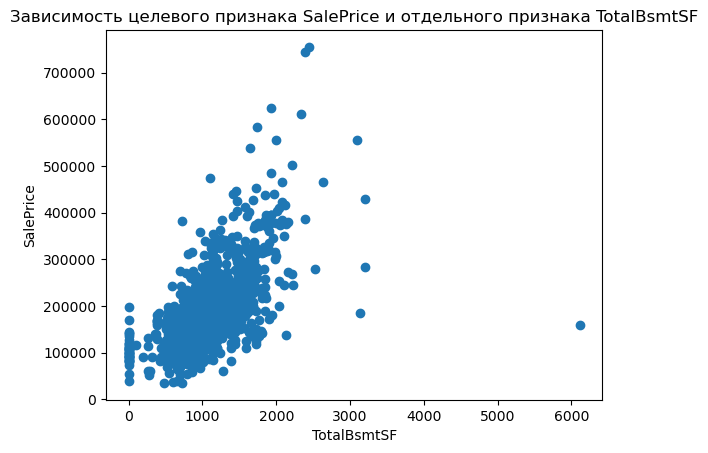

In [116]:
plt.scatter(df['TotalBsmtSF'], df['SalePrice'])
plt.xlabel('TotalBsmtSF')
plt.ylabel('SalePrice')
plt.title('Зависимость целевого признака SalePrice и отдельного признака TotalBsmtSF')
plt.show()

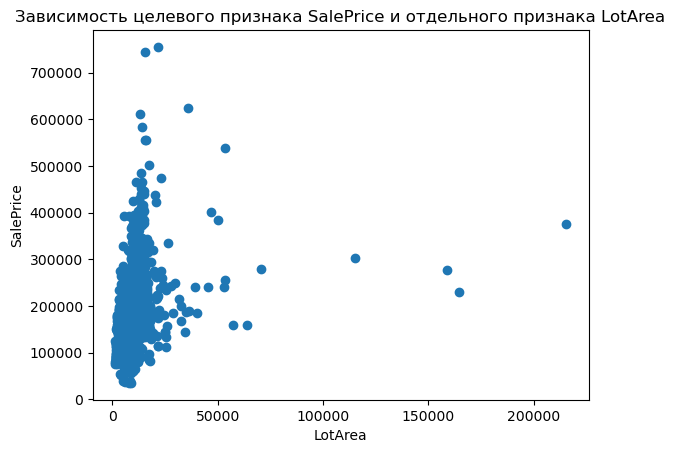

In [68]:
plt.scatter(df['LotArea'], df['SalePrice'])
plt.xlabel('LotArea')
plt.ylabel('SalePrice')
plt.title('Зависимость целевого признака SalePrice и отдельного признака LotArea')
plt.show()

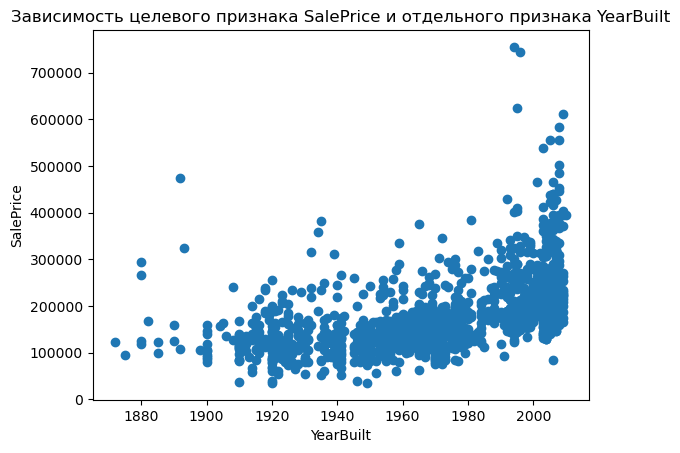

In [70]:
plt.scatter(df['YearBuilt'], df['SalePrice'])
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')
plt.title('Зависимость целевого признака SalePrice и отдельного признака YearBuilt')
plt.show()

4. Сделайте предварительные выводы.

df

5. Создайте дополнительные переменные из уже имеющихся, обоснуйте свои решения.

In [118]:
df['QualityArea'] = df['GrLivArea'] * df['OverallQual']

df['AreaToLotRatio'] = df['GrLivArea'] / df['LotArea']

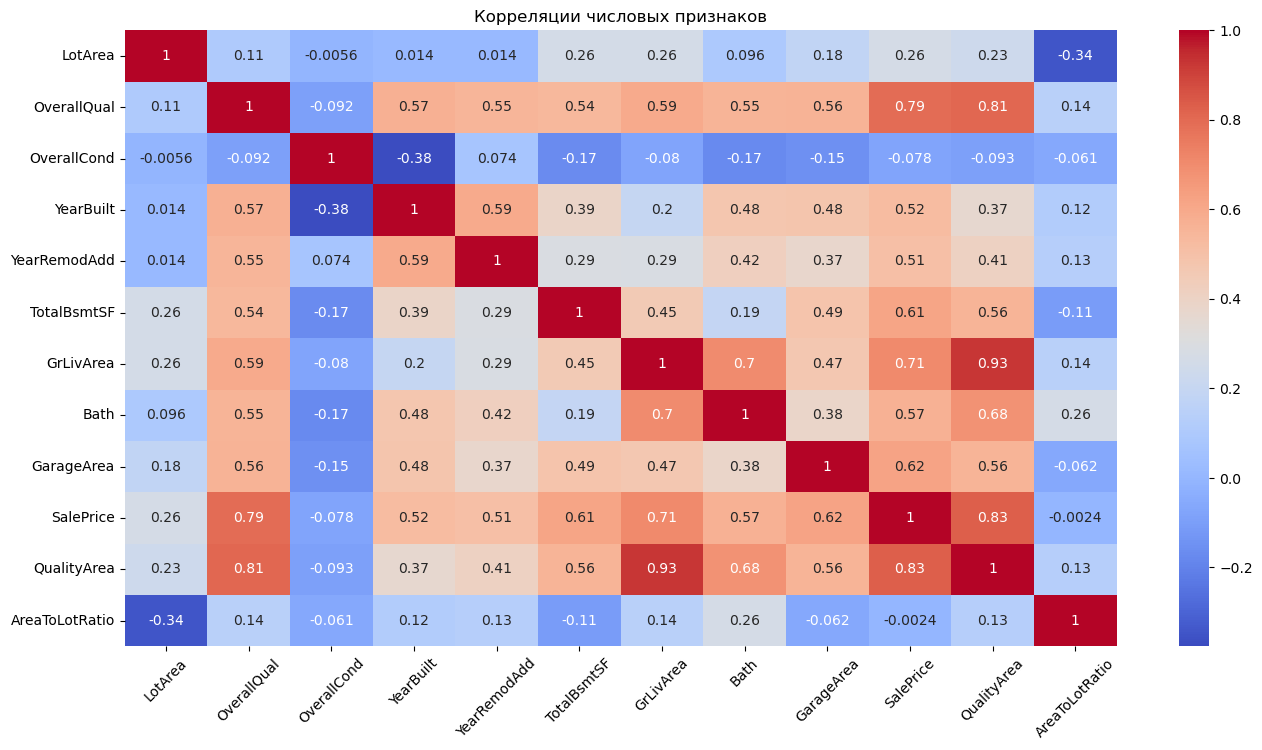

In [122]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Корреляции числовых признаков")
plt.xticks(rotation=45)
plt.show()

Area-to-Lot Ratio - Плотность застройки, соотношение жилой площади к площади участка. Показывает, насколько плотно застроен участок. 

Quality Area - Это признак, который умножает жилую площадь на общее качество дома. Зачем он нам: большой дом с низким качеством может стоить дешевле, небольшой дом с высоким качеством может стоить дороже, большой дом с высоким качеством будет стоить значительно дороже. Как можем заметить, данный признак имеет сильную положительную связь с целевой

## Задание 4 

Подготовьте данные:

2. Закодируйте категориальные признаки в тренировочной и тестовой выборках.

In [146]:
category_features = df.select_dtypes(include="object").columns
for i in category_features:
    print(f"Кол-во уникальных значений для {i} - {df[i].nunique()}")
    print(f"Уникальные значения для {i} - {df[i].unique()}")
    print("---")

Кол-во уникальных значений для Street - 2
Уникальные значения для Street - ['Pave' 'Grvl']
---
Кол-во уникальных значений для BldgType - 5
Уникальные значения для BldgType - ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
---
Кол-во уникальных значений для RoofStyle - 6
Уникальные значения для RoofStyle - ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
---
Кол-во уникальных значений для ExterQual - 4
Уникальные значения для ExterQual - ['Gd' 'TA' 'Ex' 'Fa']
---
Кол-во уникальных значений для ExterCond - 5
Уникальные значения для ExterCond - ['TA' 'Gd' 'Fa' 'Po' 'Ex']
---
Кол-во уникальных значений для Foundation - 6
Уникальные значения для Foundation - ['PConc' 'CBlock' 'BrkTil' 'Wood' 'Slab' 'Stone']
---
Кол-во уникальных значений для Heating - 6
Уникальные значения для Heating - ['GasA' 'GasW' 'Grav' 'Wall' 'OthW' 'Floor']
---
Кол-во уникальных значений для HeatingQC - 5
Уникальные значения для HeatingQC - ['Ex' 'Gd' 'TA' 'Fa' 'Po']
---
Кол-во уникальных значений для CentralAir - 2
Уни

In [156]:
df[['MonthSold', 'YearSold']] = df['DateSold'].str.split('/', expand=True).astype(int)
df = df.drop("DateSold", axis=1)

In [158]:
df

,LotArea,Street,BldgType,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,ExterQual,ExterCond,...,GrLivArea,Bath,KitchenQual,GarageArea,SaleCondition,SalePrice,QualityArea,AreaToLotRatio,MonthSold,YearSold
0,8450,Pave,1Fam,7,5,2003,2003,Gable,Gd,TA,...,1710,3,Gd,548,Normal,208500,11970,0.202367,2,2008
1,9600,Pave,1Fam,6,8,1976,1976,Gable,TA,TA,...,1262,2,TA,460,Normal,181500,7572,0.131458,5,2007
2,11250,Pave,1Fam,7,5,2001,2002,Gable,Gd,TA,...,1786,3,Gd,608,Normal,223500,12502,0.158756,9,2008
3,9550,Pave,1Fam,7,5,1915,1970,Gable,TA,TA,...,1717,1,Gd,642,Abnorml,140000,12019,0.179791,2,2006
4,14260,Pave,1Fam,8,5,2000,2000,Gable,Gd,TA,...,2198,3,Gd,836,Normal,250000,17584,0.154137,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,Pave,1Fam,6,5,1999,2000,Gable,TA,TA,...,1647,3,TA,460,Normal,175000,9882,0.208033,8,2007
1456,13175,Pave,1Fam,6,6,1978,1988,Gable,TA,TA,...,2073,2,TA,500,Normal,210000,12438,0.157343,2,2010
1457,9042,Pave,1Fam,7,9,1941,2006,Gable,Ex,Gd,...,2340,2,Gd,252,Normal,266500,16380,0.258792,5,2010
1458,9717,Pave,1Fam,5,6,1950,1996,Hip,TA,TA,...,1078,1,Gd,240,Normal,142125,5390,0.110940,4,2010


In [166]:
category_features = df.select_dtypes(include="object").columns

binary_cols = [i for i in category_features if df[i].nunique() == 2]
other_cols = [i for i in category_features if df[i].nunique() > 2]

In [168]:
le = LabelEncoder()
for i in binary_cols:
    df[i] = le.fit_transform(df[i])

In [170]:
encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(df[other_cols])

X_encoded = pd.DataFrame(encoded, columns=encoder.get_feature_names_out())
X_encoded

,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,...,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1456,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1457,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1458,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [174]:
df = df.drop(other_cols, axis=1)
df = pd.concat([df.reset_index(drop=True), X_encoded.reset_index(drop=True)], axis=1)

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 63 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   LotArea                1460 non-null   int64  
 1   Street                 1460 non-null   int32  
 2   OverallQual            1460 non-null   int64  
 3   OverallCond            1460 non-null   int64  
 4   YearBuilt              1460 non-null   int64  
 5   YearRemodAdd           1460 non-null   int64  
 6   TotalBsmtSF            1460 non-null   int64  
 7   CentralAir             1460 non-null   int32  
 8   GrLivArea              1460 non-null   int64  
 9   Bath                   1460 non-null   int64  
 10  GarageArea             1460 non-null   int64  
 11  SalePrice              1460 non-null   int64  
 12  QualityArea            1460 non-null   int64  
 13  AreaToLotRatio         1460 non-null   float64
 14  MonthSold              1460 non-null   int32  
 15  Year

3. Подготовьте числовые признаки в тренировочной и тестовой выборках к передаче в модель: приведите их к единому масштабу.

In [180]:
scaler = StandardScaler()
df[df.columns] = scaler.fit_transform(df[df.columns])

In [188]:
X = df.drop("SalePrice", axis=1)
y = df.SalePrice

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Задание 5

Займитесь обучением модели:

1. Обучите модель линейной регрессии без регуляризации. Посмотрите на веса полученной модели. Сделайте предсказания по обучающей и тестовой выборкам.

In [190]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [198]:
model.coef_

array([ 6.74338571e-02,  4.55977541e-03,  3.18478072e-01,  5.70264351e-02,
        1.13047690e-01,  1.65406944e-02,  5.74558232e-02,  1.50756175e-02,
        3.54785503e-01,  2.81079933e-02,  1.00524663e-01, -1.28311549e-01,
       -5.41113176e-02,  7.53489323e-04,  1.92825606e-03, -7.75687966e+11,
       -3.01716095e+11, -3.87886368e+11, -3.53851198e+11, -5.61534538e+11,
       -2.18937178e+11, -9.63056437e+11, -2.01532044e+11, -9.24976373e+11,
       -1.60988703e+11, -8.62000136e+10, -1.94209897e+11, -1.02121344e+11,
       -4.94323665e+11, -5.08495765e+11, -5.25167582e+09, -1.59058921e+10,
       -3.47921780e+10, -3.03413676e+09, -3.79456084e+10, -4.20915414e+09,
       -6.95433123e+09, -6.96976495e+09, -1.78403578e+09, -8.97591120e+08,
       -6.35347203e+08, -8.50964136e+10, -4.76236529e+11, -3.58923996e+11,
       -2.24680529e+11, -1.20303253e+11, -1.70017762e+11, -6.18579596e+11,
       -2.22835094e+11, -4.59338043e+11, -3.23705209e+10, -5.63227401e+11,
        2.92116332e+11,  

In [194]:
model.intercept_

-0.004071725671746898

In [203]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [242]:
mae = mean_absolute_error(y_train, y_pred_train)
mse = mean_squared_error(y_train, y_pred_train)
r2 = r2_score(y_train, y_pred_train)
print(f"MAE: {round(mae, 3)}")
print(f"MSE: {round(mse, 3)}")
print(f"R²: {round(r2, 3)}\n")

MAE: 0.252
MSE: 0.181
R²: 0.803



In [244]:
mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)
print(f"MAE: {round(mae, 3)}")
print(f"MSE: {round(mse, 3)}")
print(f"R²: {round(r2, 3)}\n")

MAE: 0.277
MSE: 0.212
R²: 0.818



2. Понаблюдайте, как ведёт себя модель с L1-регуляризацией (Lasso). Найдите лучший параметр регуляризации. Сделайте предсказания по обучающей и тестовой выборкам, замерьте качество с помощью MAE, MSE, $R^2$. Для воспроизводимости результатов задайте параметр `random_state=42` при определении модели Lasso.

In [248]:
alphas_losso = np.logspace(-4, 2, 100)

In [250]:
lasso_cv = LassoCV(alphas=alphas_losso, cv=5, random_state=42, max_iter=10000)
lasso_cv.fit(X_train, y_train)

print("Лучший параметр alpha:", lasso_cv.alpha_)
print("Количество итераций:", lasso_cv.n_iter_)

Лучший параметр alpha: 0.01
Количество итераций: 41


In [228]:
lasso_model = Lasso(alpha=lasso_cv.alpha_, random_state=42, max_iter=10000)
lasso_model.fit(X_train, y_train)

y_pred_train_lasso = lasso_model.predict(X_train)
y_pred_test_lasso = lasso_model.predict(X_test)

In [236]:
mae = mean_absolute_error(y_train, y_pred_train_lasso)
mse = mean_squared_error(y_train, y_pred_train_lasso)
r2 = r2_score(y_train, y_pred_train_lasso)
print(f"MAE: {round(mae, 3)}")
print(f"MSE: {round(mse, 3)}")
print(f"R²: {round(r2, 3)}\n")

MAE: 0.252
MSE: 0.183
R²: 0.801



In [234]:
mae = mean_absolute_error(y_test, y_pred_test_lasso)
mse = mean_squared_error(y_test, y_pred_test_lasso)
r2 = r2_score(y_test, y_pred_test_lasso)
print(f"MAE: {round(mae, 3)}")
print(f"MSE: {round(mse, 3)}")
print(f"R²: {round(r2, 3)}\n")

MAE: 0.271
MSE: 0.204
R²: 0.825



3. Понаблюдайте, как ведёт себя модель с L2-регуляризацией (Ridge). Найдите лучший параметр регуляризации. Сделайте предсказания по обучающей и тестовой выборкам, замерьте качество с помощью MAE, MSE, $R^2$. Для воспроизводимости результатов задайте параметр `random_state=42` при определении модели Ridge.

In [254]:
alphas_ridge = np.logspace(-3, 5, 100)

ridge_cv = RidgeCV(alphas=alphas_ridge, cv=5, scoring='neg_mean_squared_error')
ridge_cv.fit(X_train, y_train)

print("Лучший параметр alpha:", ridge_cv.alpha_)

Лучший параметр alpha: 312.57158496882414


In [258]:
ridge_model = Ridge(alpha=ridge_cv.alpha_, random_state=42)
ridge_model.fit(X_train, y_train)

Ridge(alpha=312.57158496882414, random_state=42)

In [260]:
y_pred_train_ridge = ridge_model.predict(X_train)
y_pred_test_ridge = ridge_model.predict(X_test)

In [265]:
mae = mean_absolute_error(y_train, y_pred_train_ridge)
mse = mean_squared_error(y_train, y_pred_train_ridge)
r2 = r2_score(y_train, y_pred_train_ridge)
print(f"MAE: {round(mae, 3)}")
print(f"MSE: {round(mse, 3)}")
print(f"R²: {round(r2, 3)}\n")

MAE: 0.251
MSE: 0.188
R²: 0.796



In [267]:
mae = mean_absolute_error(y_test, y_pred_test_ridge)
mse = mean_squared_error(y_test, y_pred_test_ridge)
r2 = r2_score(y_test, y_pred_test_ridge)
print(f"MAE: {round(mae, 3)}")
print(f"MSE: {round(mse, 3)}")
print(f"R²: {round(r2, 3)}\n")

MAE: 0.27
MSE: 0.21
R²: 0.82



Посмотрите на веса полученной модели. Какой вывод можно сделать?

## Задание 6

Ответьте на следующие вопросы:

1. В последней обученной модели выберите три признака с наибольшими положительными коэффициентами. Можно ли утверждать, что чем больше значения этих признаков, тем больше сумма сделки?

2. В последней обученной модели выберите три признака с наибольшими отрицательными коэффициентами. Можно ли утверждать, что чем больше значения этих признаков, тем меньше сумма сделки?

3. В модели Lasso выберите три признака с нулевыми коэффициентами. Как вы думаете, почему модель их исключила? Можно ли смело утверждать, что сумма сделки от этих признаков не зависит?

## Заключение

В этом модуле с помощью регуляризации вы научились обучать модели линейной регрессии с регуляризацией, подбирать коэффициент регуляризации alpha, а также отбирать признаки с помощью L1-регуляризации. 